# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


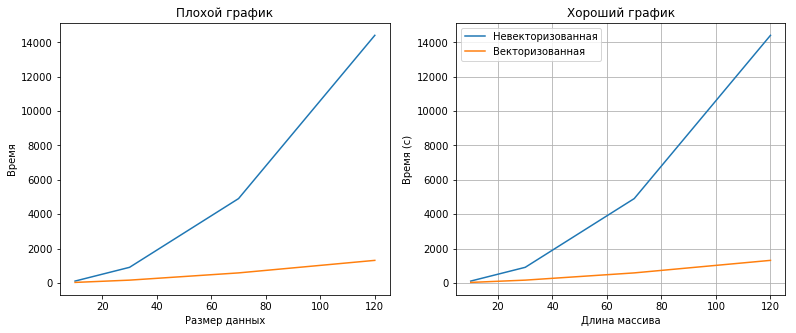

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

C:\Users\ffedo\AppData\Local\Temp\ipykernel_8080\1977504225.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


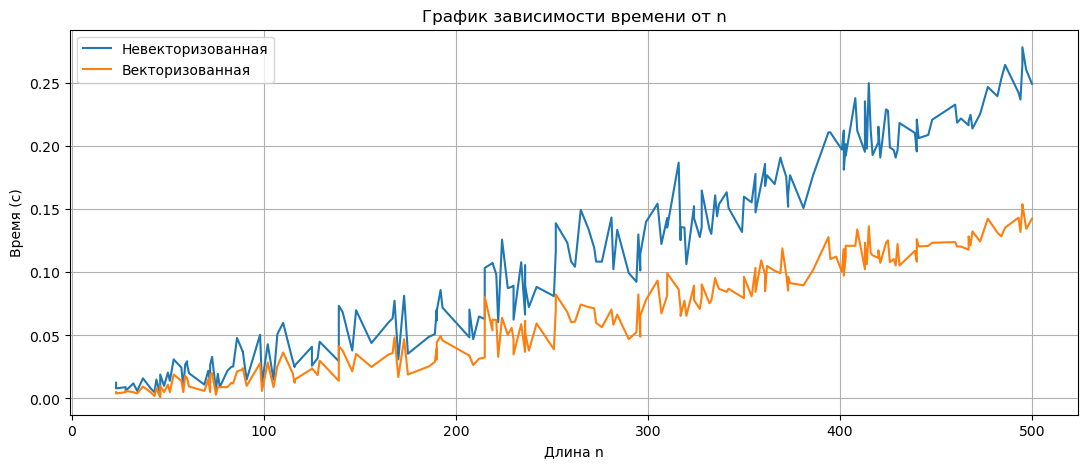

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

def prod_non_zero_diag(x):
    ans = 1
    for i in range(min(len(x), len(x[0]))):
        if (x[i][i] != 0):
            ans *= x[i][i]
    return ans

def prod_non_zero_diag_vector(x):
    diagonal = np.diagonal(x)
    nonzeroelements = diagonal[diagonal != 0]
    return np.prod(nonzeroelements)

def show(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(u"График зависимости времени от n")
    ax.set_xlabel(u"Длина n")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()
    
    f.show()
    pass

time_vectorized = np.zeros(200)
time_non_vectorized = np.zeros(200)
data_size = np.zeros(200)
ans = np.zeros(200)

for k in range(200):
    data_size[k] = random.randint(20, 500);
data_size.sort()

for k in range(200):
    n = int(data_size[k])
    m = random.randint(n, 501)
    ans[k] = n
    start = time.time()
    a = [[random.randint(-50, 50) for _ in range(m)] for _ in range(n)]
    res = prod_non_zero_diag(a)
    time_non_vectorized[k] = (time.time() - start)
    start = time.time()
    ar = np.zeros((n , m))
    for i in range(n):
        for j in range(m):
            ar[i][j] = a[i][j]
    res = prod_non_zero_diag_vector(ar)
    time_vectorized[k] = (time.time() - start)

show(time_non_vectorized, time_vectorized, data_size)

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


C:\Users\ffedo\AppData\Local\Temp\ipykernel_8080\3535778354.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


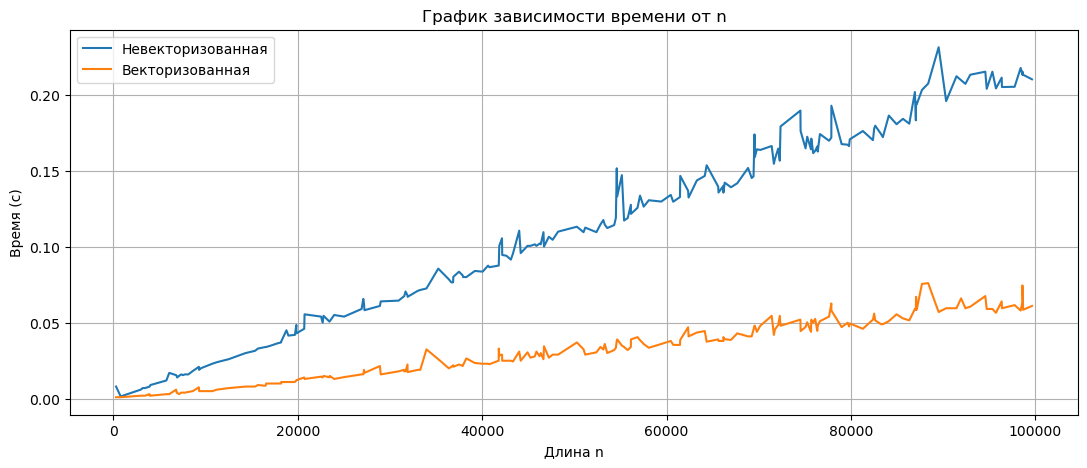

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

def are_multisets_equal(x, y):
    x.sort()
    y.sort()
    return x == y

def are_multisets_equal_vector(x, y):
    np.sort(x)
    np.sort(y)
    return np.array_equal(x, y)

def show(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(u"График зависимости времени от n")
    ax.set_xlabel(u"Длина n")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()
    
    f.show()
    pass

time_vectorized = np.zeros(200)
time_non_vectorized = np.zeros(200)
data_size = np.zeros(200)
ans = np.zeros(200)

for k in range(200):
    data_size[k] = random.randint(20, 100000);
data_size.sort()

for k in range(200):
    n = int(data_size[k])
    ans[k] = n
    start = time.time()
    a = [random.randint(-50, 50) for _ in range(n)]
    b = [random.randint(-50, 50) for _ in range(n)]
    res = are_multisets_equal(a, b)
    time_non_vectorized[k] = (time.time() - start)
    start = time.time()
    ar = np.zeros(n)
    br = np.zeros(n)
    for i in range(n):
        ar[i] = a[i]
        br[i] = b[i];
    res = are_multisets_equal_vector(ar, br)
    time_vectorized[k] = (time.time() - start)

show(time_non_vectorized, time_vectorized, data_size)

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

C:\Users\ffedo\AppData\Local\Temp\ipykernel_8080\1679584808.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


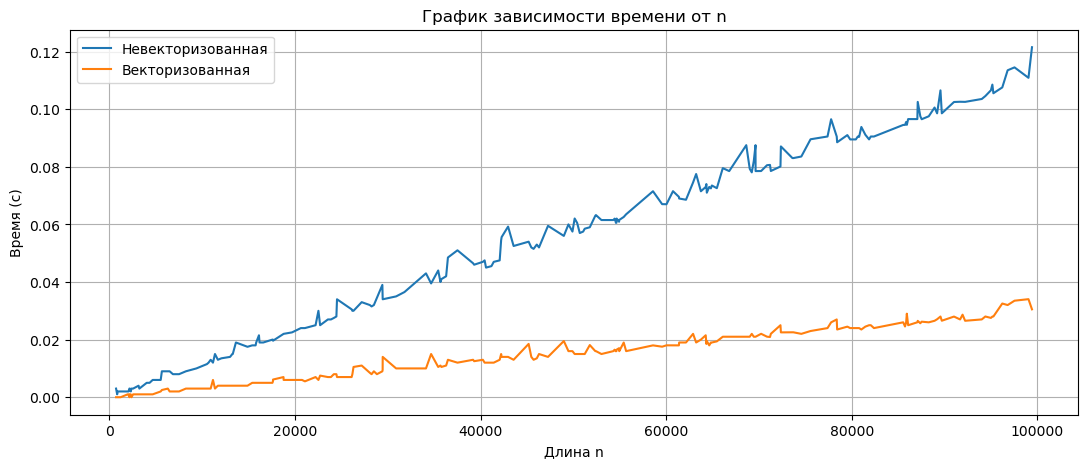

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

def max_after_zero(x):
    ans = 0
    for i in range(len(x)):
        if ((i > 0) and (x[i - 1] == 0)):
            ans = max(ans, x[i])
    return ans

def max_after_zero_vector(x):
    a = x == 0

    a = np.roll(a, 1)
    a[0] = False
    
    return np.max(x, where=a, initial=0)

def show(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(u"График зависимости времени от n")
    ax.set_xlabel(u"Длина n")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()
    
    f.show()
    pass

time_vectorized = np.zeros(200)
time_non_vectorized = np.zeros(200)
data_size = np.zeros(200)
ans = np.zeros(200)

for k in range(200):
    data_size[k] = random.randint(20, 100000);
data_size.sort()

for k in range(200):
    n = int(data_size[k])
    ans[k] = n
    start = time.time()
    a = [random.randint(0, 1000) for _ in range(n)]
    res = max_after_zero(a)
    time_non_vectorized[k] = (time.time() - start)
    start = time.time()
    ar = np.zeros(n)
    for i in range(n):
        ar[i] = a[i]
    res = max_after_zero_vector(ar)
    time_vectorized[k] = (time.time() - start)

show(time_non_vectorized, time_vectorized, data_size)

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


Невекторизированная:  1.52970290184021
Векторизированная:  0.04301047325134277


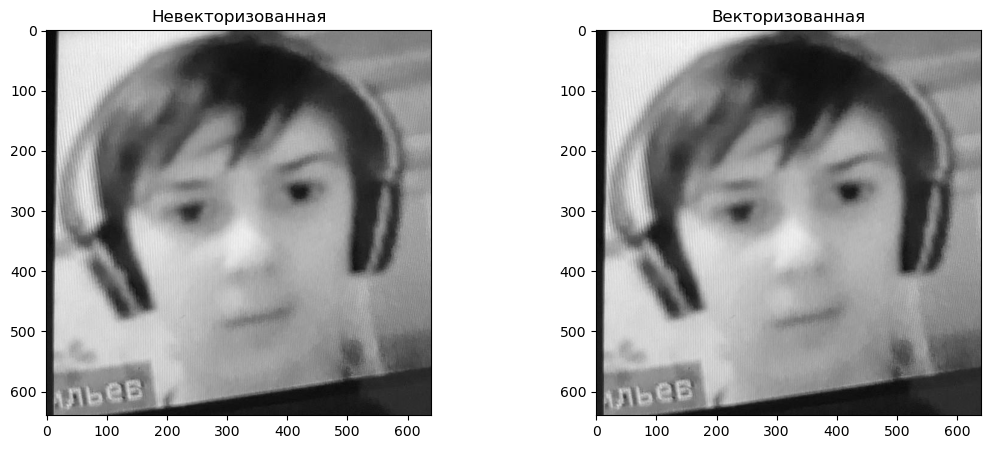

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

from PIL import Image

%matplotlib inline

def convert_image(img, coefs):
    for i in range(len(img)):
        for j in range(len(img[0])):
            img[i][j] = float(img[i][j][0]) * coefs[0] + float(img[i][j][1]) * coefs[1] + float(img[i][j][2]) * coefs[2]
    return img

def convert_image_vector(img, coefs):
    return np.dot(img, coefs)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

time_vectorized = np.zeros(200)
time_non_vectorized = np.zeros(200)
data_size = np.zeros(200)
ans = np.zeros(200)
img = np.asarray(Image.open("photo_2023-12-14_20-07-21.jpg").convert('RGB'))
a = np.copy(img)
c = np.array([0.299, 0.587, 0.114])

a = np.copy(np.asarray(a))
start = time.time()
a = Image.fromarray(convert_image(a, c)).convert('RGB')
print("Невекторизированная: ", time.time() - start)
ax1.set_title(u"Невекторизованная")
ax1.imshow(a)

start = time.time()
a = Image.fromarray(convert_image_vector(a, c)).convert('RGB')
print("Векторизированная: ", time.time() - start)
ax2.set_title(u"Векторизованная")
ax2.imshow(a)

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

C:\Users\ffedo\AppData\Local\Temp\ipykernel_8080\2759934077.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


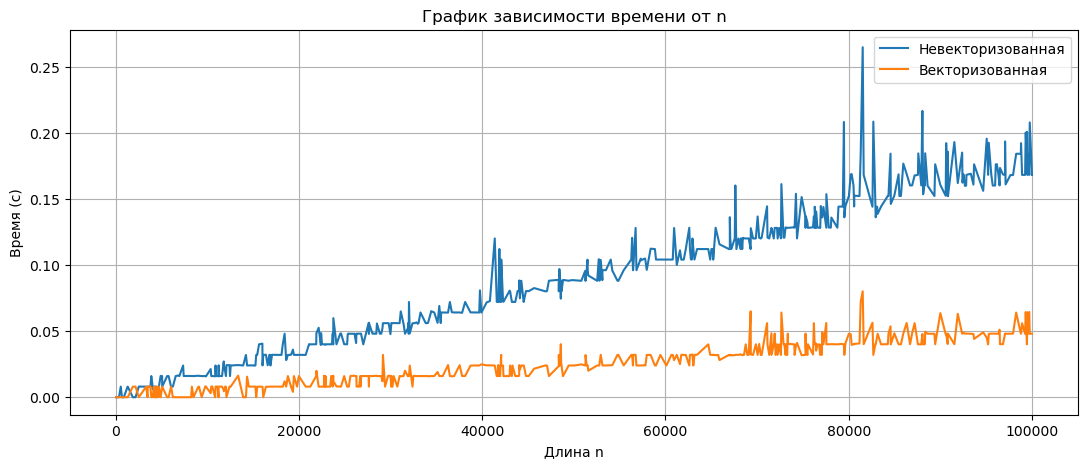

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

def run_length_encoding(x):
    cnt = 0
    cur = x[0]
    a = []
    b = []
    for i in x:
        if (cur == i):
            cnt += 1
        else:
            a.append(cur)
            b.append(cnt)
            cnt = 1
            cur = i
    a.append(cur)
    b.append(cnt)
    return (a, b)

def run_length_encoding_vector(x):
    dif = np.diff(x)
    h = np.array([-1])
    h = np.append(h, np.nonzero(dif))
    h += 1
    a = x[h]
    h = np.append(h, len(x))
    b = np.diff(h)
    return (a, b)

def show(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(u"График зависимости времени от n")
    ax.set_xlabel(u"Длина n")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()
    
    f.show()
    pass

time_vectorized = np.zeros(500)
time_non_vectorized = np.zeros(500)
data_size = np.zeros(500)
ans = np.zeros(500)

for k in range(500):
    data_size[k] = random.randint(20, 100000);
data_size.sort()

for k in range(500):
    n = int(data_size[k])
    ans[k] = n
    start = time.time()
    a = [random.randint(0, 1000) for _ in range(n)]
    res = run_length_encoding(a)
    time_non_vectorized[k] = (time.time() - start)
    start = time.time()
    ar = np.zeros(n)
    for i in range(n):
        ar[i] = a[i]
    res = run_length_encoding_vector(ar)
    time_vectorized[k] = (time.time() - start)

show(time_non_vectorized, time_vectorized, data_size)

 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

C:\Users\ffedo\AppData\Local\Temp\ipykernel_8080\1696897562.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


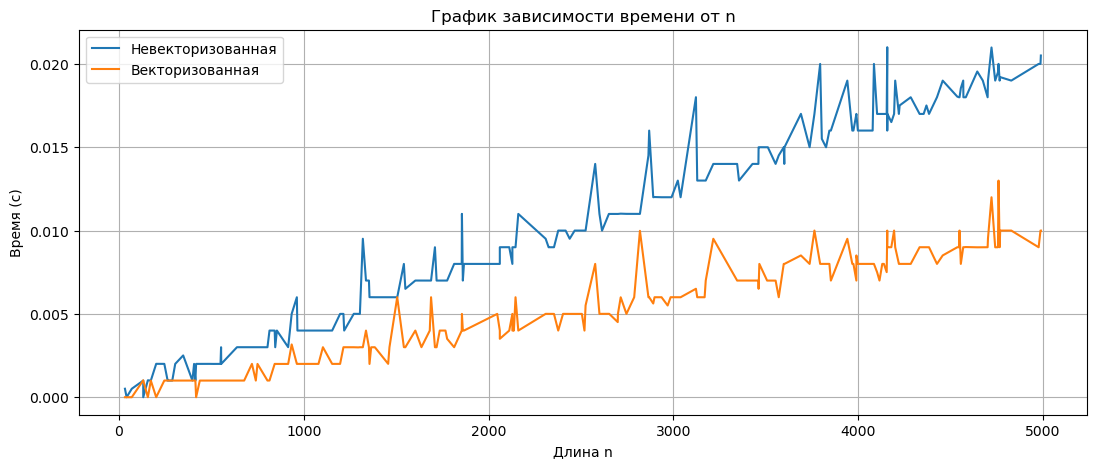

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

def show(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(u"График зависимости времени от n")
    ax.set_xlabel(u"Длина n")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()
    
    f.show()
    pass

def pairwise_distance(x, y):
    ans = []
    for i in range(len(x)):
        ans.append([])
        for j in range(len(y)):
            ans[i].append(((x[i][0] - y[j][0]) ** 2 + (x[i][1] - y[j][1]) ** 2) ** 0.5)
    return ans
    
def pairwise_distance_vector(x, y):
    dist_matrix_np = np.sqrt(np.sum((x[:, np.newaxis] - y) ** 2, axis = 2))
    return dist_matrix_np
    
time_vectorized = np.zeros(200)
time_non_vectorized = np.zeros(200)
data_size = np.zeros(200)
ans = np.zeros(200)

for k in range(200):
    data_size[k] = random.randint(20, 5000);
data_size.sort()

for k in range(200):
    n = int(data_size[k])
    ans[k] = n
    start = time.time()
    x = [[random.randint(0, 1000) for _ in range(n)] for _ in range(2)]
    y = [[random.randint(0, 1000) for _ in range(n)] for _ in range(2)]
    res = pairwise_distance(x, y)
    time_non_vectorized[k] = (time.time() - start)
    start = time.time()
    x1 = np.zeros((2, n))
    y1 = np.zeros((2, n))
    for i in range(n):
        x1[0][i]=x[0][i]
        x1[1][i]=x[1][i]
        y1[0][i]=y[0][i]
        y1[1][i]=y[1][i]
    res = pairwise_distance_vector(x1, y1)
    time_vectorized[k] = (time.time() - start)

show(time_non_vectorized, time_vectorized, data_size)

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

Когда я делал это дз, я спрашивал о функциях Дениса Тугова, за что я ему сердечно благодарен

In [ ]:
# code here